<b>Import liabraries and load datasets</b>

In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [189]:
data = pd.read_csv('heart_failure.csv')
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


<b>Exploratory Data Analysis</b>

In [190]:
data.shape

(918, 12)

In [191]:
data_info = pd.DataFrame(data.dtypes, columns=['Tipe'])
data_info['null'] = data.isnull().sum()
data_info['unik'] = data.nunique()

data_info

,Tipe,null,unik
Age,int64,0,50
Sex,object,0,2
ChestPainType,object,0,4
RestingBP,int64,0,67
Cholesterol,int64,0,222
FastingBS,int64,0,2
RestingECG,object,0,3
MaxHR,int64,0,119
ExerciseAngina,object,0,2
Oldpeak,float64,0,53


In [192]:
data['FastingBS'].unique()

array([0, 1], dtype=int64)

In [193]:
data.duplicated().sum()

0

In [194]:
data.describe().style.background_gradient(cmap='Reds')

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [195]:
data.describe(include='object').T

,count,unique,top,freq
Sex,918,2,M,725
ChestPainType,918,4,ASY,496
RestingECG,918,3,Normal,552
ExerciseAngina,918,2,N,547
ST_Slope,918,3,Flat,460


<b>Visualization</b>

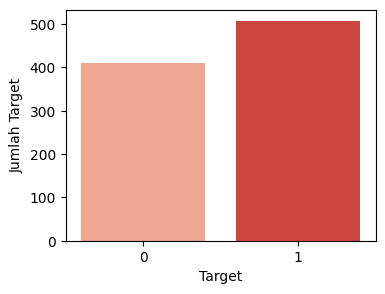

In [196]:
plt.figure(figsize=(4, 3))
sns.countplot(x='HeartDisease', data=data, palette='Reds')
plt.xlabel('Target')
plt.ylabel('Jumlah Target')
plt.show()

In [197]:
Numerical_col=[]
Categorical_col=[]
for feature in data.columns:
    if data[feature].dtype!="object":
        Numerical_col.append(feature)
    else:
        Categorical_col.append(feature)

print(Categorical_col)
print(Numerical_col)

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']


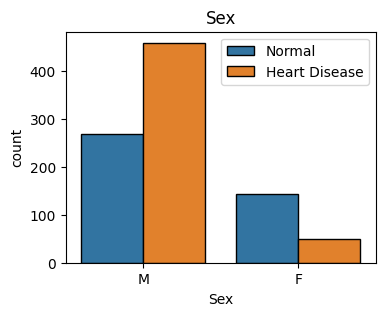

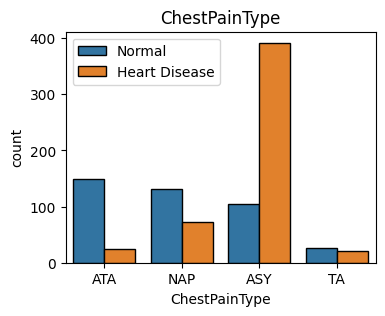

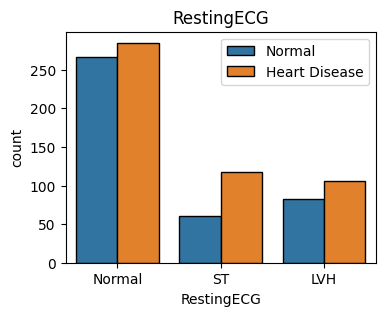

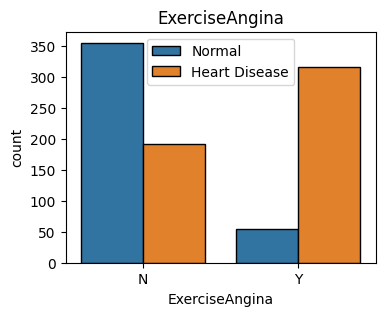

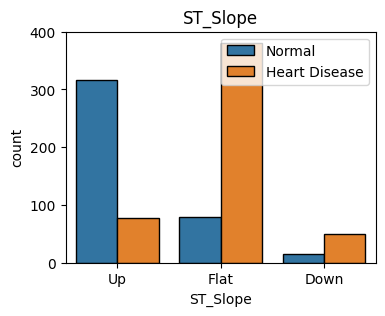

In [198]:
for i in Categorical_col:
    plt.figure(figsize=(4, 3))
    sns.countplot(x=i, data=data, hue='HeartDisease', edgecolor='black')
    plt.legend(['Normal', 'Heart Disease'])
    plt.title(i)
    plt.show()

In [199]:
num_col = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

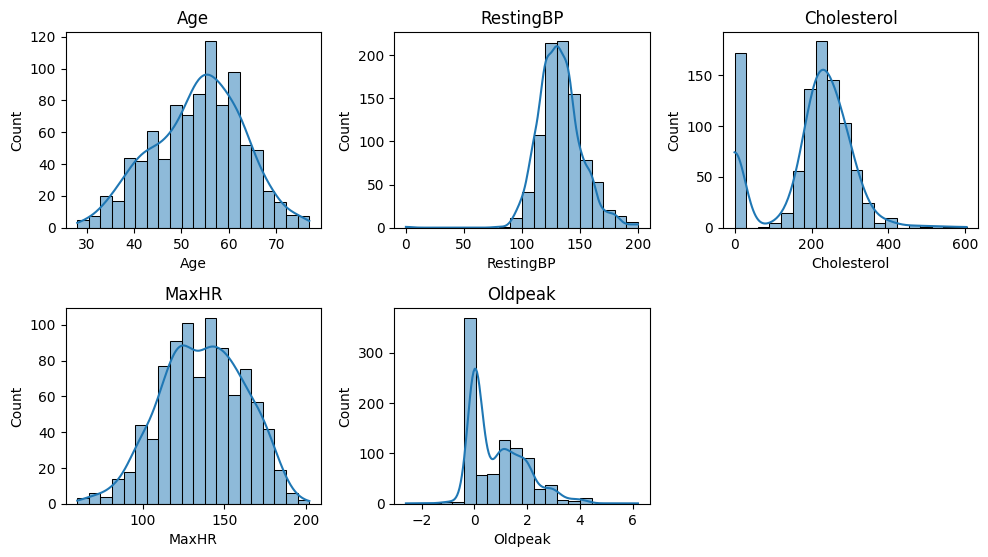

In [200]:
plt.figure(figsize=(10, 8))
for i, column in enumerate(data[num_col].columns, 1):
    plt.subplot(3, 3, i)  
    sns.histplot(data[column], kde=True, bins=20, edgecolor='black')
    plt.title(column)

plt.tight_layout()
plt.show()

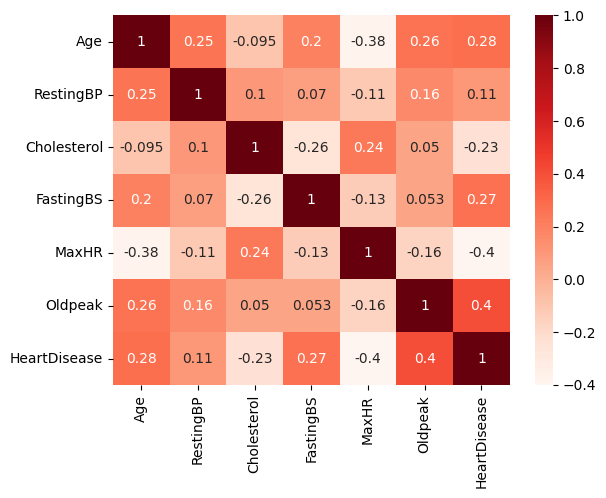

In [201]:
sns.heatmap(data[Numerical_col].corr(), annot=True, cmap='Reds')
plt.show()

<b>Data Preprocessing</b>

In [202]:
data.describe().style.background_gradient(cmap='Reds') 

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [203]:
cat_col = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [204]:
data.describe().style.background_gradient(cmap='Reds')

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [205]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [206]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for kolom in Categorical_col:
    data[kolom] = encoder.fit_transform(data[kolom])

In [207]:
X = data.drop(['HeartDisease', 'RestingECG', 'RestingBP'], axis=1)
y = data['HeartDisease']

In [208]:
cat_features = ['Sex', 'ChestPainType', 'FastingBS', 'ExerciseAngina', 'ST_Slope']
num_features = ['Age', 'Cholesterol', 'MaxHR', 'Oldpeak']

In [209]:
target_distribution = data['HeartDisease'].value_counts(normalize=True)
print(target_distribution)

HeartDisease
1    0.553377
0    0.446623
Name: proportion, dtype: float64


In [210]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

In [211]:
X

,Age,Sex,ChestPainType,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,289,0,172,0,0.000000,2
1,49,0,2,180,0,156,0,1.000000,1
2,37,1,1,283,0,98,0,0.000000,2
3,48,0,0,214,0,108,1,1.500000,1
4,54,1,2,195,0,122,0,0.000000,2
...,...,...,...,...,...,...,...,...,...
1011,58,1,0,213,0,108,0,0.000000,2
1012,56,0,0,223,0,98,0,0.000000,2
1013,59,1,0,0,0,131,1,1.610062,2
1014,56,0,0,461,0,89,0,0.642032,0


<b>Pake Pipeline</b>

In [212]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [213]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [221]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features)
    ], remainder='passthrough')

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', KNeighborsClassifier(n_neighbors=3))
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['Age', 'Cholesterol',
                                                   'MaxHR', 'Oldpeak'])])),
                ('model', KNeighborsClassifier(n_neighbors=3))])

In [222]:
test_pred_knn = pipeline.predict(X_test)
test_accuracy = accuracy_score(y_test, test_pred_knn)
print("Testing Accuracy: ", test_accuracy)

train_pred_knn = pipeline.predict(X_train)
train_accuracy = accuracy_score(y_train, train_pred_knn)
print("Training Accuracy: ", train_accuracy)

Testing Accuracy:  0.8676470588235294
Training Accuracy:  0.9088669950738916


In [216]:
import pickle

with open('model.pkl', 'wb') as f:
    pickle.dump(pipeline, f)